# PHP - Pulsating Heat Pipe [AL2O3, 60FR, Atm]

In [1]:
from analysis import PulseHeatPipe
from analysis import DataVisualisation

In [2]:
analysis = PulseHeatPipe("data/al2o3_diwater_exp_atm/60_FR/")

Data loaded from directory: data/al2o3_diwater_exp_atm/60_FR/


In [3]:
df, df_conv = analysis.data_etl()

Compiled and converted data is saved at: data/al2o3_diwater_exp_atm/60_FR/'combined_converted_data.csv'


In [4]:
df_gfe = analysis.gibbs_fe(df_conv)

Gibbs Free Energy calculated data saved at: data/al2o3_diwater_exp_atm/60_FR/'gfe_combined.csv


In [5]:
df_gfe

,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W],GFE[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,0.0,300.15,298.40,1.75,1.013250,0.021875,32.846481,32.654972,0.191509
1,0.5,300.15,298.40,1.75,1.013250,0.021875,32.846481,32.654972,0.191509
2,1.0,301.82,298.15,3.67,1.013250,0.045833,33.029235,32.627614,0.401621
3,1.5,303.82,298.15,5.67,1.013250,0.070833,33.248102,32.627614,0.620488
4,2.0,305.15,298.40,6.75,1.013250,0.084375,33.393649,32.654972,0.738676
...,...,...,...,...,...,...,...,...,...
96,48.0,369.48,337.40,32.08,1.797185,0.401042,1800.788214,1644.435269,156.352944
97,48.5,369.82,337.65,32.17,1.797185,0.402083,1802.445321,1645.653730,156.791590
98,49.0,370.15,337.90,32.25,1.797185,0.403125,1804.053690,1646.872192,157.181498
99,49.5,369.82,338.40,31.42,1.797185,0.392708,1802.445321,1649.309114,153.136207


In [6]:
visual = DataVisualisation('AL203_DI_60FR_Atm')

Data loaded from directory: AL203_DI_60FR_Atm


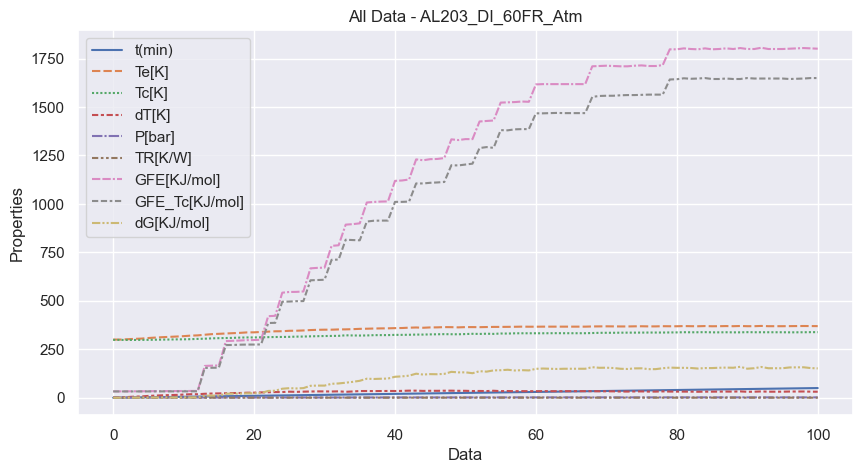

In [7]:
visual.plot_all_data(df_gfe)

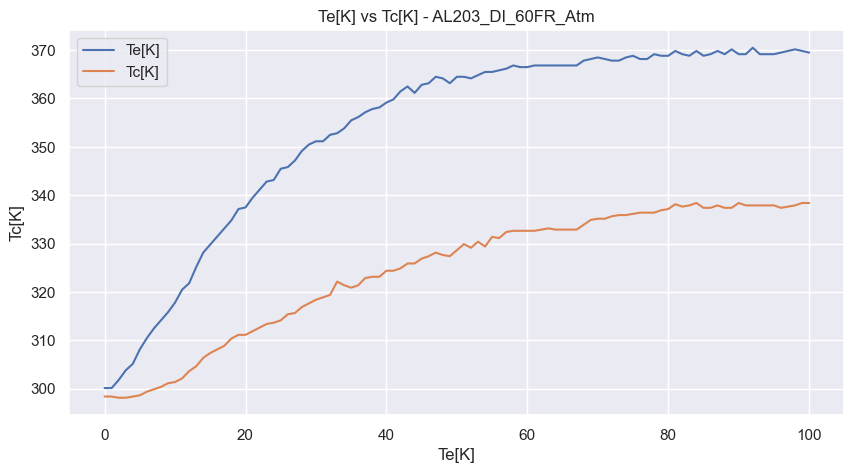

In [8]:
visual.plot_Te_Tc(df_gfe)

In [9]:
df_selected =  analysis.data_chop(df_gfe)    

Optimal range of temperature(Te) for data selection: [Tmin:300.15, Tmax:370]


In [10]:
df_mean, df_std = analysis.data_stat(df_selected)

Calculated mean and standard deviation values saved at data/al2o3_diwater_exp_atm/60_FR/'combined_mean.csv' and 'combined_std.csv'


In [11]:
df_mean

,Te[K],t(min),Tc[K],dT[K],P[bar],TR[K/W],GFE[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,300.15,0.250000,298.40,1.75,1.013250,0.021875,32.846481,32.654972,0.191509
1,301.82,1.000000,298.15,3.67,1.013250,0.045833,33.029235,32.627614,0.401621
2,303.82,1.500000,298.15,5.67,1.013250,0.070833,33.248102,32.627614,0.620488
3,305.15,2.000000,298.40,6.75,1.013250,0.084375,33.393649,32.654972,0.738676
4,308.15,2.500000,298.65,9.50,1.013250,0.118750,33.721949,32.682331,1.039619
...,...,...,...,...,...,...,...,...,...
57,369.15,44.277778,337.65,31.50,1.791852,0.393750,1789.948866,1637.241699,152.707167
58,369.48,49.000000,337.90,31.58,1.797185,0.394792,1800.788214,1646.872192,153.916022
59,369.82,44.800000,338.10,31.72,1.797185,0.396458,1802.445321,1647.846961,154.598360
60,370.15,46.750000,337.65,32.50,1.797185,0.406250,1804.053690,1645.653730,158.399959


In [12]:
analysis.data_property_avg(df_mean, df_std)

Tc  average:     318.5824 +- 0.5565 [K]
P   average:     1.3452 +- 0.0161 [bar]
dT  average:     27.6376 +- 0.5565 [K]
TR  average:     0.3455 +- 0.007 [K/W]
GFE average:     828.2687 +- 30.9437 [KJ/mol]



In [13]:
analysis.best_TP(df_mean)

Optimal G(T,P) condition at lowest (optimal) dG[0.1915]
Te optimal:        300.15[K] 
P  optimal:        1.0132[bar] 
dT optimal:        1.75[K] 
TR optimal:        0.0219[K/W] 
GFE optimal:       dG(300.15, 1.0132) = 32.8465 [KJ/mol]



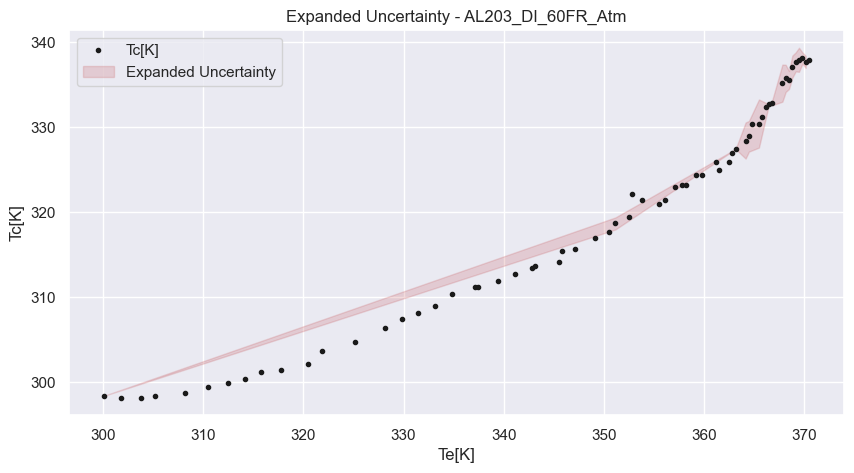

In [14]:
visual.plot_eu(df_mean, df_std, 'Tc[K]')

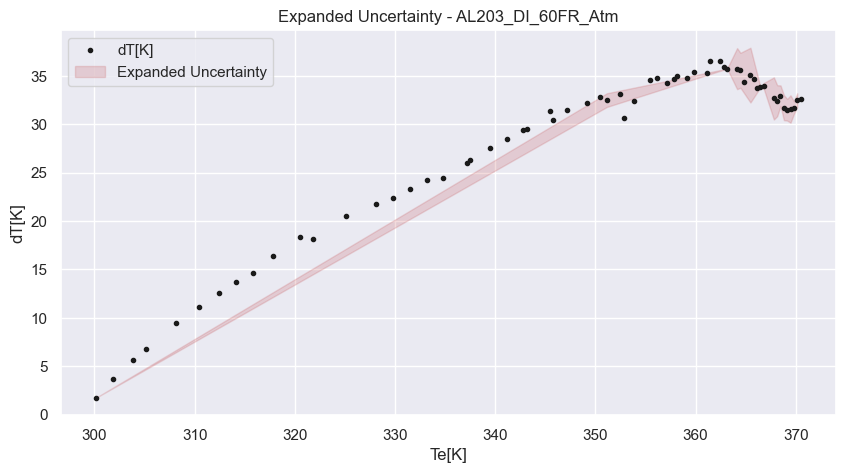

In [15]:
visual.plot_eu(df_mean, df_std, 'dT[K]')

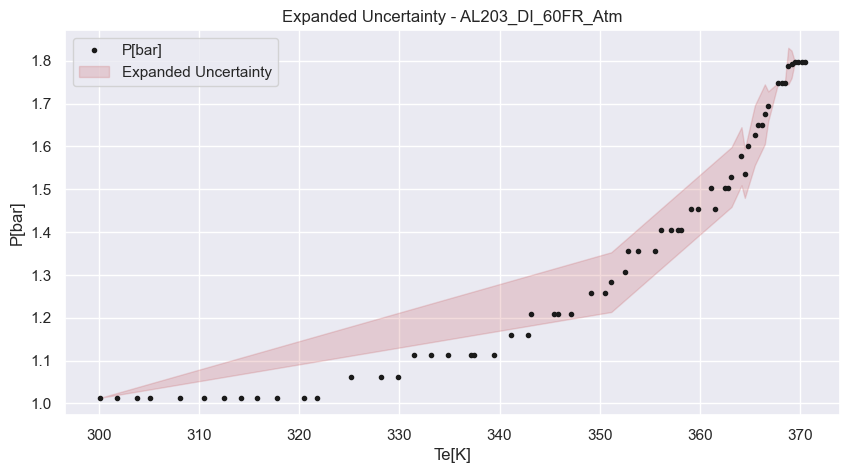

In [16]:
visual.plot_eu(df_mean, df_std, 'P[bar]')

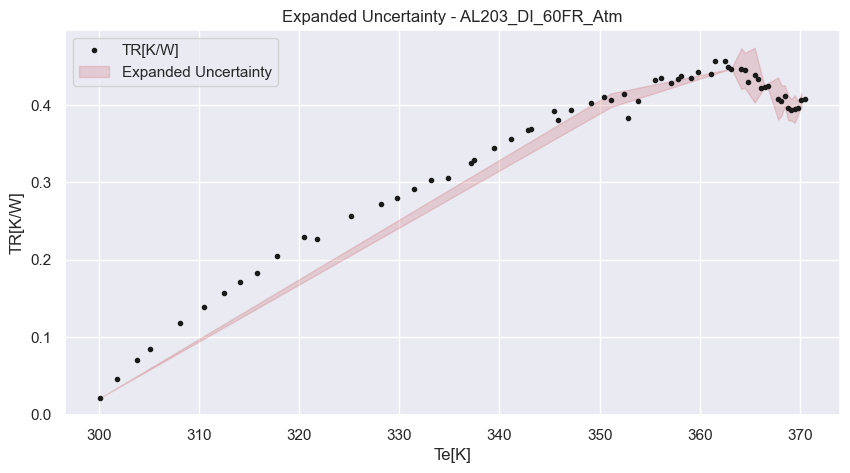

In [17]:
visual.plot_eu(df_mean, df_std, 'TR[K/W]')

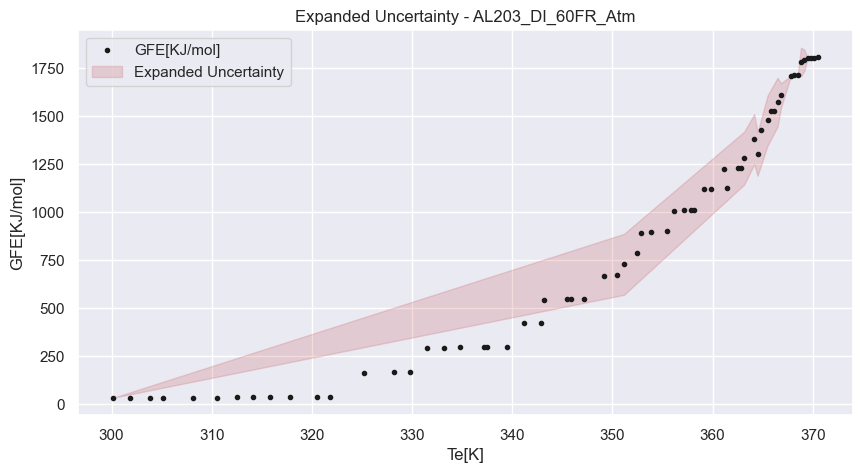

In [18]:
visual.plot_eu(df_mean, df_std, 'GFE[KJ/mol]')

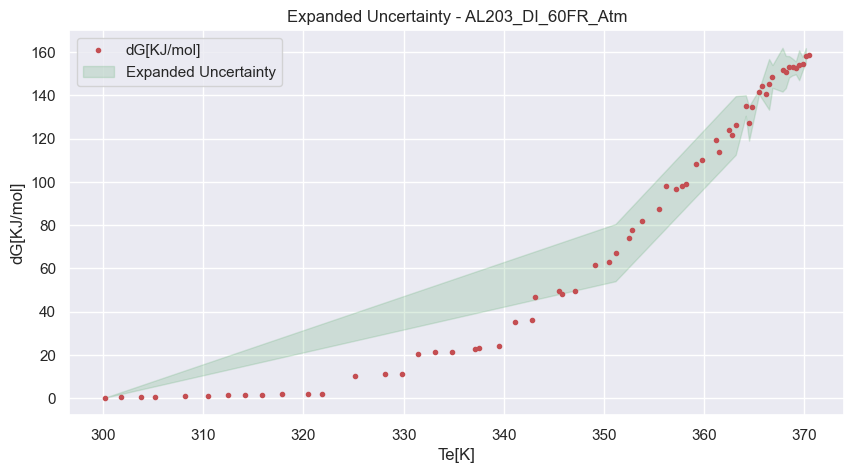

In [19]:
visual.plot_eu(df_mean, df_std, 'dG[KJ/mol]','.r','g')